In [78]:
##### Import Python Libraries
import pandas as pd
import numpy as np
import datetime 
# plotting
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#metrics
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
#Lassocv
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
print(__doc__)
from sklearn import linear_model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

Automatically created module for IPython interactive environment


In [51]:
#Reading the excel file into dataframe
df=pd.read_csv("train.csv")

In [52]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26,1,1-2 Year,No,30170,26,88,0
381105,381106,Male,30,1,37,1,< 1 Year,No,40016,152,131,0
381106,381107,Male,21,1,30,1,< 1 Year,No,35118,160,161,0
381107,381108,Female,68,1,14,0,> 2 Years,Yes,44617,124,74,0


In [53]:
#create an empty DataFrame object to create dummy objects
df_dummy = pd.DataFrame() 

In [54]:
#encode features
def Policy_Sales_Channel_dummy(df) :
    if (df["Policy_Sales_Channel"]in(152,160)) :
        return 1
    return 0
df_dummy["Policy_Sales_Channel_dummy"] = df.apply(lambda df:Policy_Sales_Channel_dummy(df),axis = 1)

In [55]:
#Tenure to categorical column
def Annual_Premium_dummy(df) :
    
    if df["Annual_Premium"] <= 10000 :
        return "Premium_ls_10k"
    elif (df["Annual_Premium"] > 10000) & (df["Annual_Premium"] <= 20000 ):
        return "Premium_ls_20k"
    elif (df["Annual_Premium"] > 20000) & (df["Annual_Premium"] <= 30000 ):
        return "Premium_ls_30k"
    elif (df["Annual_Premium"] > 30000) & (df["Annual_Premium"] <= 40000 ):
        return "Premium_ls_40k"
    elif df["Annual_Premium"] > 40000 :
        return "Premium_gt_40k"
df_dummy["Annual_Premium_dummy"] = df.apply(lambda df:Annual_Premium_dummy(df),axis = 1)


In [56]:
def vehicle_age_dummy(df) :
    if (df["Vehicle_Age"] == "> 2 Years" ) :
        return 0
    return 1
df_dummy["vehicle_age_dummy"] = df.apply(lambda df:vehicle_age_dummy(df),axis = 1)

In [57]:
def Region_Code_dummy(df) :
    if (df["Region_Code"]in(8,46)) :
        return 1
    return 0
df_dummy["Region_Code_dummy"] = df.apply(lambda df:Region_Code_dummy(df),axis = 1)

In [58]:
def Age_dummy(df) :
    if (df["Age"]in(22,23,24,25)) :
        return 1
    return 0
df_dummy["Age_dummy"] = df.apply(lambda df:Age_dummy(df),axis = 1)

In [59]:
df_dummy.Annual_Premium_dummy = df_dummy.Annual_Premium_dummy.replace({"Premium_ls_10k":1,"Premium_ls_20k":2,"Premium_ls_30k":3,"Premium_ls_40k":4,"Premium_gt_40k":5})

In [60]:
df.Gender = df.Gender.replace({"Male":0,"Female":1})

In [61]:
df.Vehicle_Damage = df.Vehicle_Damage.replace({"No":0,"Yes":1})

In [65]:
final_df = pd.concat([df, df_dummy], axis=1)

In [66]:
final_df=final_df.drop(['id',
               'Gender', 
               'Age', 
               'Region_Code',
               'Vehicle_Age',
               'Policy_Sales_Channel',
               'Vintage',
               'Annual_Premium'], axis=1)

In [67]:
final_df

,Driving_License,Previously_Insured,Vehicle_Damage,Response,Policy_Sales_Channel_dummy,Annual_Premium_dummy,vehicle_age_dummy,Region_Code_dummy,Age_dummy
0,1,0,1,1,0,5,0,0,0
1,1,0,0,0,0,4,1,0,0
2,1,0,1,1,0,4,0,0,0
3,1,1,0,0,1,3,1,0,0
4,1,1,0,0,1,3,1,0,0
...,...,...,...,...,...,...,...,...,...
381104,1,1,0,0,0,4,1,0,0
381105,1,1,0,0,1,5,1,0,0
381106,1,1,0,0,1,4,1,0,0
381107,1,0,1,0,0,5,0,0,0


In [68]:
#Check Missing Values
print("\nMissing values:", final_df.isnull().sum().values.sum())


Missing values: 0


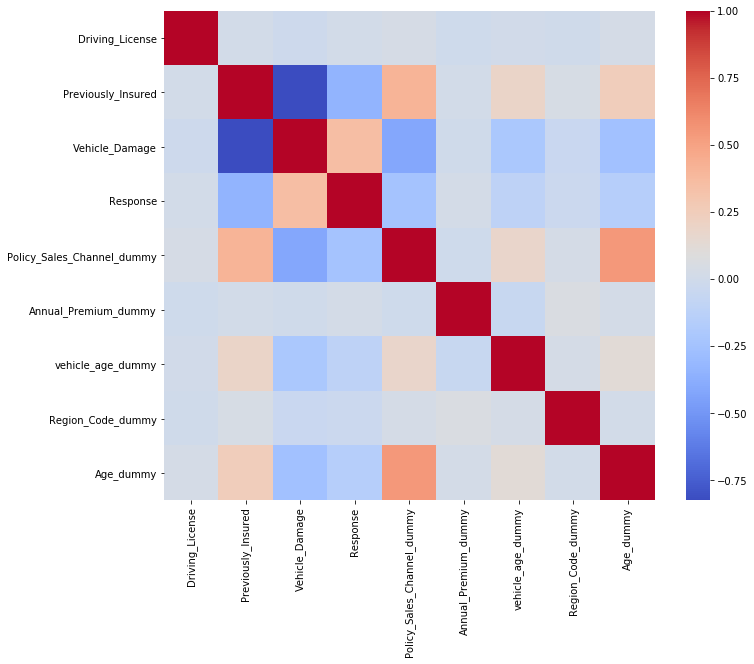

In [69]:
#EDA on fields 
#correlation
correlation = final_df.corr()
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(correlation,cmap='coolwarm')

In [72]:
#Input and output variables
X,y = final_df.drop('Response',axis=1),final_df['Response']

In [73]:
#Split the data into 70-30 train test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=50)

In [74]:
X_train.shape, X_test.shape ,y_train.shape, y_test.shape

((266776, 8), (114333, 8), (266776,), (114333,))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


Text(0.5, 1.0, 'Insurance Feature Importance')

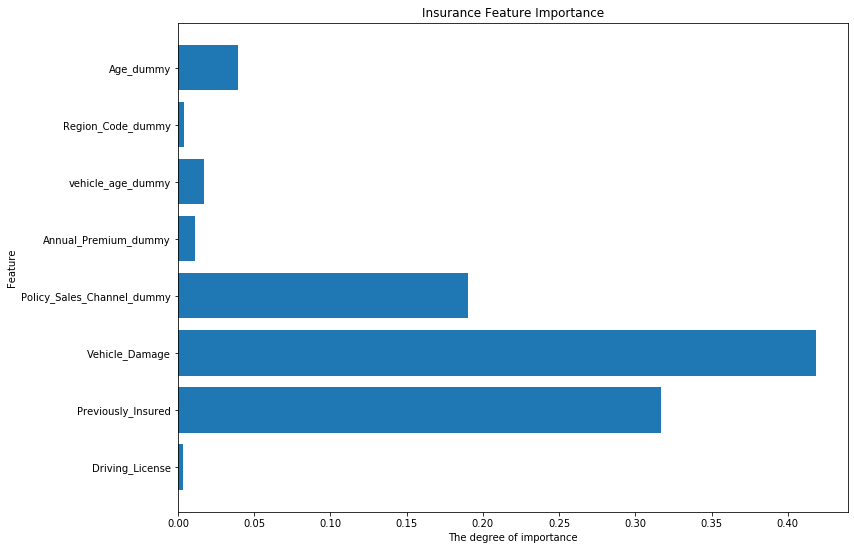

In [75]:
# Feature importance using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

## Fit the model on your training data.
rfc.fit(X_train, y_train) 
## And score it on your testing data.
rfc.score(X_test, y_test)

# Fitting the training data
rf_fit = rfc.fit(X_train, y_train)

# Predicting on the test data
rf_pred = rfc.predict(X_test)

# Declaring the number of features in the X_train data
n_features = X_train.shape[1]

# Setting the plot window
figsize = plt.subplots(figsize = (12, 9))

# Specifying the contents of the plot
plt.barh(range(n_features), rfc.feature_importances_, align = 'center')
plt.yticks(pd.np.arange(n_features), X_train.columns)
plt.xlabel("The degree of importance")
plt.ylabel("Feature")
plt.title("Insurance Feature Importance")

In [79]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)
sel.get_support()
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)
print(selected_feat)

Index(['Previously_Insured', 'Vehicle_Damage', 'Policy_Sales_Channel_dummy'], dtype='object')


In [81]:
X_train_rf= X_train.filter (['Previously_Insured', 'Vehicle_Damage', 'Policy_Sales_Channel_dummy'])

In [82]:
X_test_rf= X_test.filter (['Previously_Insured', 'Vehicle_Damage', 'Policy_Sales_Channel_dummy'])

In [83]:
# Build full logistic regression model with selected features using Random Forest selection
#Logistic regressiom
logreg3 = LogisticRegression(max_iter=20000)
logreg3.fit(X_train_rf, y_train)
y_pred_2 = logreg3.predict(X_test_rf)
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_pred_2))

Testing accuracy on selected features: 0.877


In [85]:
# Build Random Forest model with selected features using Random Forest selection
#Random Forest 
from sklearn.ensemble import RandomForestClassifier
rf3 = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=4)
rf3.fit(X_train_rf, y_train)

y_train_pred = rf3.predict(X_train_rf)
print('Training accuracy on selected features: %.3f' % accuracy_score(y_train, y_train_pred))

y_test_pred = rf3.predict(X_test_rf)
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_test_pred))

Training accuracy on selected features: 0.878
Testing accuracy on selected features: 0.877


In [86]:
# Build Decision Tree model with selected features using random forest selection
#Decision tree
from sklearn.tree import DecisionTreeClassifier
desctree3 = DecisionTreeClassifier(max_depth=3)
desctree3.fit(X_train_rf, y_train)
y_pred_desct = desctree3.predict(X_test_rf)

[Text(581.25, 990.9375, 'X[1] <= 0.5\ngini = 0.215\nsamples = 266776\nvalue = [234142, 32634]'),
 Text(290.625, 707.8125, 'X[0] <= 0.5\ngini = 0.01\nsamples = 132243\nvalue = [131566, 677]'),
 Text(145.3125, 424.6875, 'X[2] <= 0.5\ngini = 0.072\nsamples = 16786\nvalue = [16155, 631]'),
 Text(72.65625, 141.5625, 'gini = 0.087\nsamples = 9751\nvalue = [9305, 446]'),
 Text(217.96875, 141.5625, 'gini = 0.051\nsamples = 7035\nvalue = [6850, 185]'),
 Text(435.9375, 424.6875, 'X[2] <= 0.5\ngini = 0.001\nsamples = 115457\nvalue = [115411, 46]'),
 Text(363.28125, 141.5625, 'gini = 0.001\nsamples = 40806\nvalue = [40776, 30]'),
 Text(508.59375, 141.5625, 'gini = 0.0\nsamples = 74651\nvalue = [74635, 16]'),
 Text(871.875, 707.8125, 'X[2] <= 0.5\ngini = 0.362\nsamples = 134533\nvalue = [102576, 31957]'),
 Text(726.5625, 424.6875, 'X[0] <= 0.5\ngini = 0.398\nsamples = 106484\nvalue = [77289, 29195]'),
 Text(653.90625, 141.5625, 'gini = 0.408\nsamples = 102018\nvalue = [72859, 29159]'),
 Text(799.21

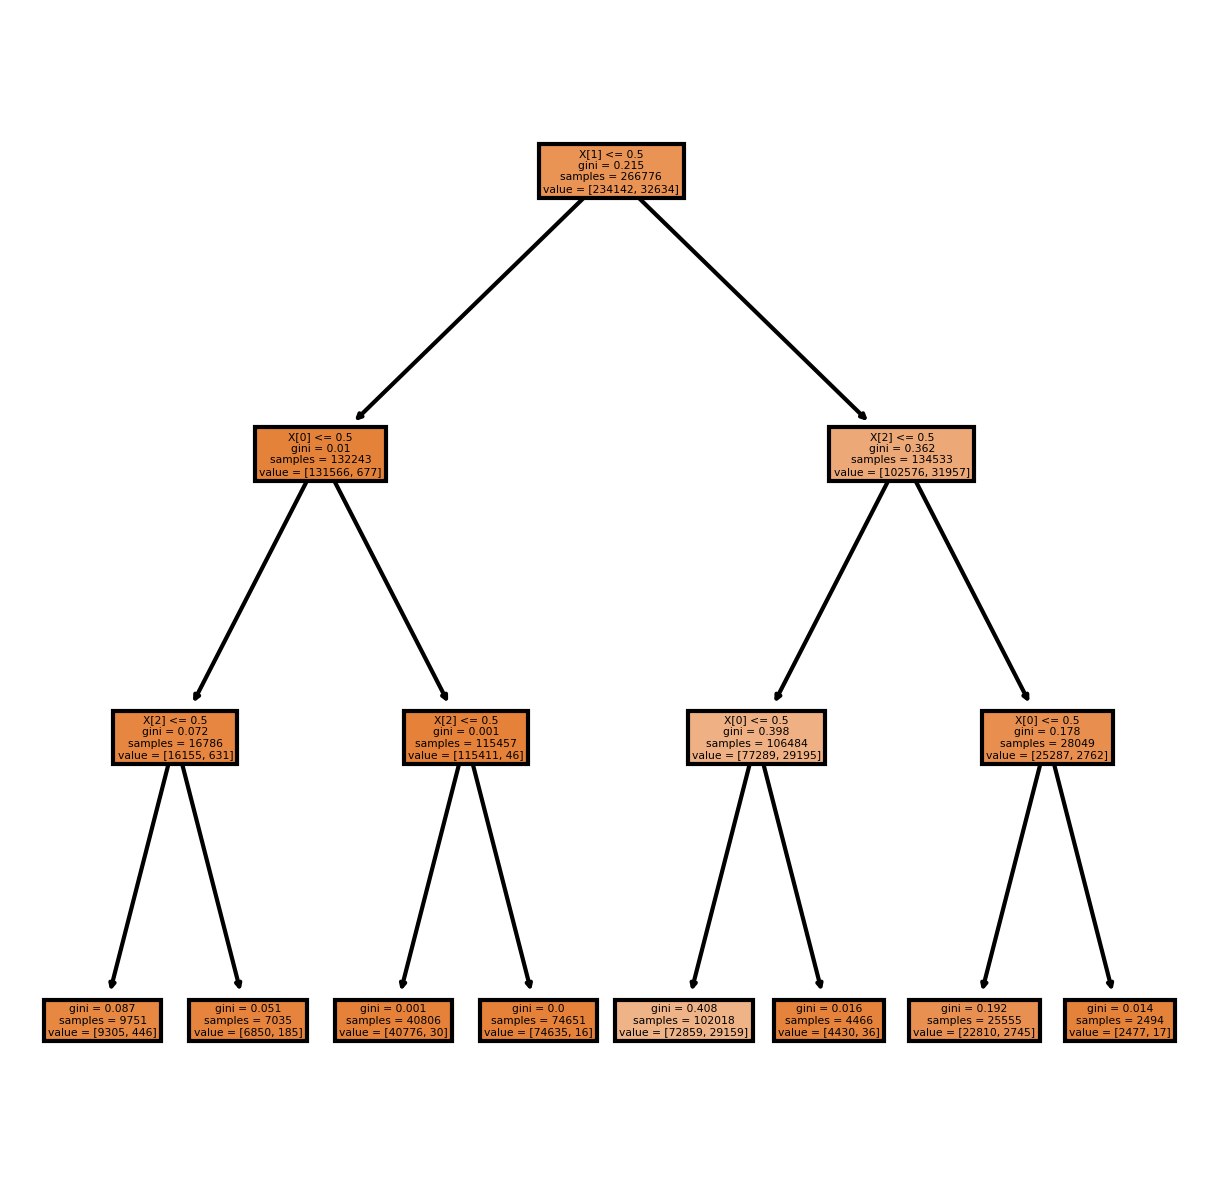

In [87]:
#Plot the decision tree
from matplotlib import pyplot as plt
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(desctree3, filled=True)

In [88]:
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(y_test, y_pred_desct))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(y_test, y_pred_desct))
print('Root Mean Squared Error: %.3f' %  np.sqrt(metrics.mean_squared_error(y_test, y_pred_desct)))
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_pred_desct))

Mean Absolute Error: 0.123
Mean Squared Error: 0.123
Root Mean Squared Error: 0.351
Testing accuracy on selected features: 0.877


In [89]:
# Build XGBoost Classifier model with selected features using Lasso selection
#Xgbclassifier
import xgboost as xgb
from xgboost import XGBClassifier
xgbc3 = xgb.XGBClassifier(objective='reg:logistic')
xgbc3.fit(X_train_rf,y_train)
y_pred_xgbc = xgbc3.predict(X_test_rf)

In [90]:
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(y_test, y_pred_xgbc))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(y_test, y_pred_xgbc))
print('Root Mean Squared Error: %.3f' %  np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgbc)))
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_pred_xgbc))

Mean Absolute Error: 0.123
Mean Squared Error: 0.123
Root Mean Squared Error: 0.351
Testing accuracy on selected features: 0.877
